The game features a special event, an in-game event, for which users can spend money. A group of designers has decided to change the appearance of the window for purchasing in-game event products. To evaluate the outcome of this innovation, an A/B test was conducted, dividing users into two groups: the control group and the test group (with the new type of window).

Investigate which of the A/B groups performed better. Provide the results in a format understandable to a broad audience, accompanied by graphs/dashboards/figures as necessary.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [2]:
df = pd.read_csv(r'C:\Users\User\Desktop\j\portfolio_drafts\data.csv')

df.head()

,AbGroup,user_id,time_stamp,install_date,event_name,platform,network_name,country_name,InGameTime,LastCompletedLevel,avg_energy_amount,revenue_on_event,revenue_on_other_activities,gold_on_event,gold_on_other_activities
0,Control,d60ebcaecff2dc1d360a8a41271e6fd8a902c107,2020-02-10,2019-11-10,ResourceSpend,itunes,Organic,United Kingdom of Great Britain and Northern I...,276180,345,54.0,0.0,0.0,NaN,NaN
1,Test,f6e385b0ab43d5aea9cfcc408aa84029a4ea5fdb,2020-03-04,2019-11-05,ResourceSpend,itunes,Paid,United States of America,166095,199,50.0,0.0,0.0,NaN,NaN
2,Control,a4c80c8524e2c11cc238553d7b02da01ce2aad66,2020-02-26,2020-01-02,ResourceSpend,itunes,Paid,Canada,240986,84,39.0,0.0,0.0,NaN,NaN
3,Control,7ea2e4599ae33760c307e254839317bd5b17a63c,2020-02-21,2020-01-13,ResourceSpend,itunes,Organic,France,989822,1176,21.0,0.0,0.0,NaN,NaN
4,Control,6495168982929360dc6d84bf0766d8963a7ddc41,2020-02-18,2020-02-05,ResourceSpend,itunes,Paid,Spain,52106,66,43.0,0.0,0.0,500.0,NaN


In [3]:
df.shape

(696840, 15)

In [4]:
df['AbGroup'].value_counts()

AbGroup
Control    558070
Test       138770
Name: count, dtype: int64

In [5]:
df['AbGroup'].value_counts(normalize=True) # test group = 20%

AbGroup
Control    0.800858
Test       0.199142
Name: proportion, dtype: float64

In [6]:
df.groupby('AbGroup')['user_id'].agg(['count','nunique'])

,count,nunique
AbGroup,,
Control,558070,89034
Test,138770,22278


In [7]:
df['time_stamp'] = pd.to_datetime(df['time_stamp'],format='%Y-%m-%d')
df['install_date'] = pd.to_datetime(df['install_date'],format='%Y-%m-%d')

In [8]:
len(df.query('revenue_on_event == 0')) # ??
len(df.query('revenue_on_other_activities == 0'))

696840

In [9]:
len(df.query('gold_on_event > 0')) 

45412

In [10]:
len(df.query('gold_on_other_activities > 0'))

168193

<AxesSubplot:xlabel='time_stamp'>

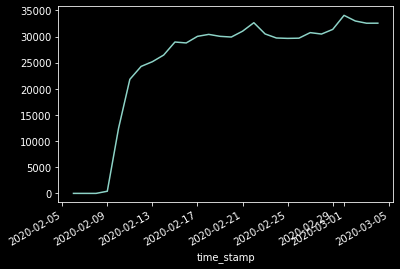

In [11]:
df.groupby('time_stamp')['user_id'].count().plot()

<AxesSubplot:xlabel='time_stamp'>

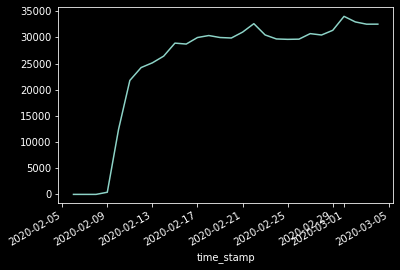

In [12]:
df.groupby('time_stamp')['user_id'].nunique().plot()

In [13]:
df.groupby('time_stamp')['user_id'].agg(['count','nunique']).head(10)

,count,nunique
time_stamp,,
2020-02-06,4,3
2020-02-08,1,1
2020-02-09,413,410
2020-02-10,12472,12445
2020-02-11,21822,21767
2020-02-12,24292,24225
2020-02-13,25194,25131
2020-02-14,26464,26407
2020-02-15,28959,28894


In [14]:
df.query('gold_on_event > 0').groupby('time_stamp')['gold_on_event'].agg('count')

time_stamp
2020-02-06       3
2020-02-09      50
2020-02-10    1129
2020-02-11    1796
2020-02-12    1876
2020-02-13    1830
2020-02-14    1928
2020-02-15    1987
2020-02-16    1753
2020-02-17    1917
2020-02-18    2015
2020-02-19    1906
2020-02-20    1972
2020-02-21    2029
2020-02-22    2249
2020-02-23    2095
2020-02-24    1908
2020-02-25    1899
2020-02-26    1963
2020-02-27    1956
2020-02-28    1961
2020-02-29    2022
2020-03-01    2246
2020-03-02    2212
2020-03-03    2300
2020-03-04     410
Name: gold_on_event, dtype: int64

<AxesSubplot:>

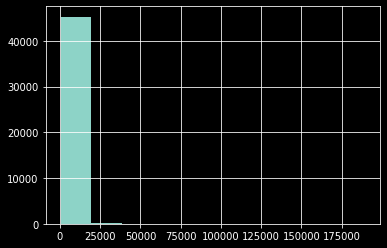

In [15]:
df['gold_on_event'].hist()

<AxesSubplot:>

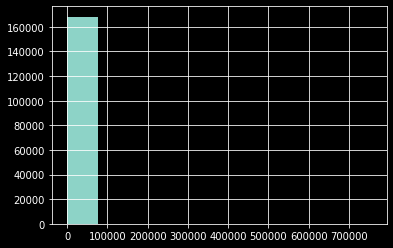

In [16]:
df['gold_on_other_activities'].hist()

The distributions have heavy tails, so we will convert the variable into a binary one for further analysis.

In [17]:
df['gold_on_event_flag'] = (df['gold_on_event'] > 0)*1
df['gold_on_other_activities_flag'] = (df['gold_on_other_activities'] > 0)*1

In [18]:
(df.groupby(['AbGroup'])
[['gold_on_event_flag','gold_on_event']]
 .agg({'gold_on_event_flag':['count','mean'],
       'gold_on_event':['mean','median']}))

gold_on_event_flag          gold_on_event        
                     count     mean          mean  median
AbGroup                                                  
Control             558070  0.06523   1965.211658  1000.0
Test                138770  0.06492   2104.606505  1500.0

In [72]:
df.head()

,AbGroup,user_id,time_stamp,install_date,event_name,platform,network_name,country_name,InGameTime,LastCompletedLevel,avg_energy_amount,revenue_on_event,revenue_on_other_activities,gold_on_event,gold_on_other_activities,gold_on_event_flag,gold_on_other_activities_flag
0,Control,d60ebcaecff2dc1d360a8a41271e6fd8a902c107,2020-02-10,2019-11-10,ResourceSpend,itunes,Organic,United Kingdom of Great Britain and Northern I...,276180,345,54.0,0.0,0.0,NaN,NaN,0,0
1,Test,f6e385b0ab43d5aea9cfcc408aa84029a4ea5fdb,2020-03-04,2019-11-05,ResourceSpend,itunes,Paid,United States of America,166095,199,50.0,0.0,0.0,NaN,NaN,0,0
2,Control,a4c80c8524e2c11cc238553d7b02da01ce2aad66,2020-02-26,2020-01-02,ResourceSpend,itunes,Paid,Canada,240986,84,39.0,0.0,0.0,NaN,NaN,0,0
3,Control,7ea2e4599ae33760c307e254839317bd5b17a63c,2020-02-21,2020-01-13,ResourceSpend,itunes,Organic,France,989822,1176,21.0,0.0,0.0,NaN,NaN,0,0
4,Control,6495168982929360dc6d84bf0766d8963a7ddc41,2020-02-18,2020-02-05,ResourceSpend,itunes,Paid,Spain,52106,66,43.0,0.0,0.0,500.0,NaN,1,0


In [64]:
t = (df.groupby(['user_id','AbGroup'])[['gold_on_event_flag','gold_on_event']]
 .agg({'gold_on_event_flag':['count','mean'],
       'gold_on_event':['mean','median']})).reset_index()

In [65]:
t

user_id  AbGroup gold_on_event_flag  \
                                                                       count   
0       00000d6d79ec151d74c5b0c0705d9d9fe252fe83  Control                  2   
1       000133682d2dcd90c1a9c8ca5e34a294f31af64f  Control                 19   
2       0001f13b0535b174bc7e36a1846c31c7a091c4b0  Control                 11   
3       00021d57aced59fbfaf63ba620afada82fc06ca8     Test                 13   
4       00027b7d34e10c17bfd4f76aa626403a2c5d1044     Test                  7   
...                                          ...      ...                ...   
111307  fffea25b3877c861a4ebaa00e8fb9c5b96672e00  Control                  1   
111308  fffeb6c54253ef0e7b0c4f38eb81a9dd9aebcb14  Control                  5   
111309  ffff1964e1cb3bb0fc17c9ed440e3a6b6e6adf99  Control                  6   
111310  ffff86c1dc72ba25d61ad8c92e9a5b3d6e2f5547  Control                  5   
111311  ffffb50d0170ef0bc2eda7d20211b2c963c61e2a  Control                 24   

                 gold_on_event          
            mean          mean  median  
0       0.000000           NaN     NaN  
1       0.105263        1250.0  1250.0  
2       0.000000           NaN     NaN  
3       0.000000           NaN     NaN  
4       0.000000           NaN     NaN  
...          ...           ...     ...  
111307  0.000000           NaN     NaN  
111308  0.000000           NaN     NaN  
111309  0.000000           NaN     NaN  
111310  0.000000           NaN     NaN  
111311  0.000000           NaN     NaN  

[111312 rows x 6 columns]

In [66]:
t.columns = ['_'.join(el) for el in t.columns.to_flat_index()]

In [70]:
t

,user_id_,AbGroup_,gold_on_event_flag_count,gold_on_event_flag_mean,gold_on_event_mean,gold_on_event_median
0,00000d6d79ec151d74c5b0c0705d9d9fe252fe83,Control,2,0.000000,NaN,NaN
1,000133682d2dcd90c1a9c8ca5e34a294f31af64f,Control,19,0.105263,1250.0,1250.0
2,0001f13b0535b174bc7e36a1846c31c7a091c4b0,Control,11,0.000000,NaN,NaN
3,00021d57aced59fbfaf63ba620afada82fc06ca8,Test,13,0.000000,NaN,NaN
4,00027b7d34e10c17bfd4f76aa626403a2c5d1044,Test,7,0.000000,NaN,NaN
...,...,...,...,...,...,...
111307,fffea25b3877c861a4ebaa00e8fb9c5b96672e00,Control,1,0.000000,NaN,NaN
111308,fffeb6c54253ef0e7b0c4f38eb81a9dd9aebcb14,Control,5,0.000000,NaN,NaN
111309,ffff1964e1cb3bb0fc17c9ed440e3a6b6e6adf99,Control,6,0.000000,NaN,NaN
111310,ffff86c1dc72ba25d61ad8c92e9a5b3d6e2f5547,Control,5,0.000000,NaN,NaN


In [80]:
t.query('gold_on_event_mean > 0').groupby('AbGroup_').agg({'gold_on_event_mean':'sum'})

,gold_on_event_mean
AbGroup_,
Control,2.264984e+07
Test,6.293894e+06


In [81]:
2.264984e+07/(10685)

2119.779129620964

In [71]:
t.drop(columns = ['user_id_']).groupby('AbGroup_').agg(['count','mean'])

gold_on_event_flag_count           gold_on_event_flag_mean            \
                            count      mean                   count      mean   
AbGroup_                                                                        
Control                     89034  6.268055                   89034  0.031600   
Test                        22278  6.229015                   22278  0.030891   

         gold_on_event_mean              gold_on_event_median               
                      count         mean                count         mean  
AbGroup_                                                                    
Control               10685  2119.778819                10685  2002.976135  
Test                   2603  2417.938571                 2603  2296.811371

H0: there is no difference between two groups

In [85]:
(df.groupby(['AbGroup'])
[['gold_on_event_flag','gold_on_event']]
 .agg({'gold_on_event_flag':['count','mean'],
       'gold_on_event':['mean','median']}))

gold_on_event_flag          gold_on_event        
                     count     mean          mean  median
AbGroup                                                  
Control             558070  0.06523   1965.211658  1000.0
Test                138770  0.06492   2104.606505  1500.0

In [88]:
from tqdm.notebook import tqdm
import numpy as np

In [89]:
group_size = df['AbGroup'].value_counts().values
n = 1000
result = []
base_diff = 500

for _ in tqdm(range(n)):
  a = df.sample(group_size[0],replace=True)['gold_on_event'].median()
  b = df.sample(group_size[1],replace=True)['gold_on_event'].median()
  result.append(np.abs(a-b) >= base_diff)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [90]:
np.mean(result)

0.126

Conclusion: There is no difference between both groups' average transaction values 

In [91]:
df['gold_on_event_nona'] = df['gold_on_event'].fillna(0)

In [92]:
(df.groupby(['AbGroup'])
[['gold_on_event_nona']]
 .agg(['mean','median']))

gold_on_event_nona       
                      mean median
AbGroup                          
Control         128.191087    0.0
Test            136.631837    0.0

In [93]:
n = 1000
result = []
base_diff = 136.631837 - 128.191087

for _ in tqdm(range(n)):
  a = df.sample(group_size[0],replace=True)['gold_on_event_nona'].mean()
  b = df.sample(group_size[1],replace=True)['gold_on_event_nona'].mean()
  result.append(np.abs(a-b) >= base_diff)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [94]:
np.mean(result)

0.012

Conclusion: Group B pays more therefore it performs better.